In [18]:
import os
import random
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [19]:
df = pd.read_csv("bank.csv")
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [20]:
cols_to_drop = ['contact' , 'day' , 'month', 'duration' , 'previous']
df.drop(cols_to_drop , axis=1 , inplace=True)

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'campaign', 'pdays', 'deposit'],
      dtype='object')

In [22]:
dtypes = df.dtypes
Number = df.nunique()
pd.DataFrame({"DataTypes":dtypes , "NumberOfUnique":Number}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
DataTypes,int64,object,object,object,int64,object,object,int64,int64,object
NumberOfUnique,76,12,3,4,3805,2,2,36,472,2


In [23]:
cat_cols = ['job' , 'marital' , 'education' , 'housing' , 'loan' , 'deposit']
df[cat_cols] = df[cat_cols].astype('category')

In [24]:
dtypes = df.dtypes
Number = df.nunique()
pd.DataFrame({"DataTypes":dtypes , "NumberOfUnique":Number}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
DataTypes,int64,category,category,category,int64,category,category,int64,int64,category
NumberOfUnique,76,12,3,4,3805,2,2,36,472,2


In [25]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null":null , "RatioOfNull":ratio}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,deposit
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RatioOfNull,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


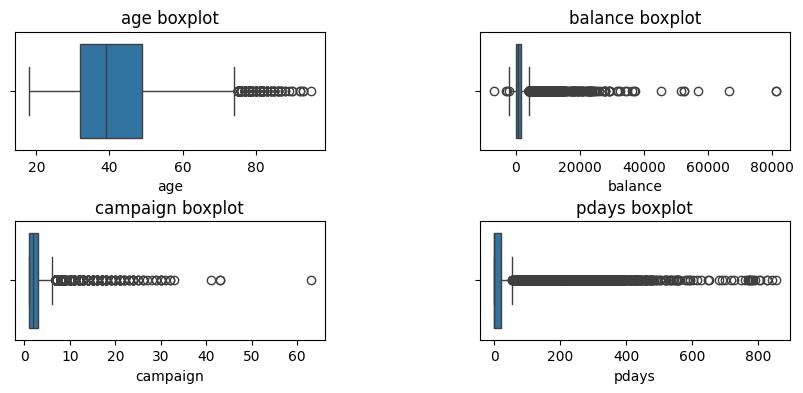

In [27]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(10,4))
for i , col in enumerate(num_cols):
    plt.subplot(2 , 2 ,i+1)
    sns.boxplot(df[col] , orient='h')
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6 , wspace=.5)
plt.show()

In [30]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence,inplace=True)

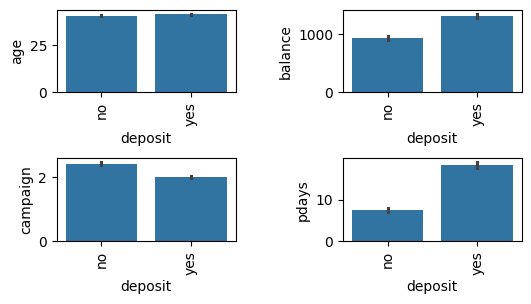

In [31]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(6,3))
for i , col in enumerate(num_cols):
    plt.subplot(2 , 2 ,i+1)
    sns.barplot(x="deposit" , y=col ,  data=df)
    plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.8 , wspace=.6)
plt.show()

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
deposit,,,,,,,,,,,,
no,703,1236,205,165,1265,262,218,554,91,983,155,36
yes,631,708,123,109,1301,516,187,369,269,840,202,34


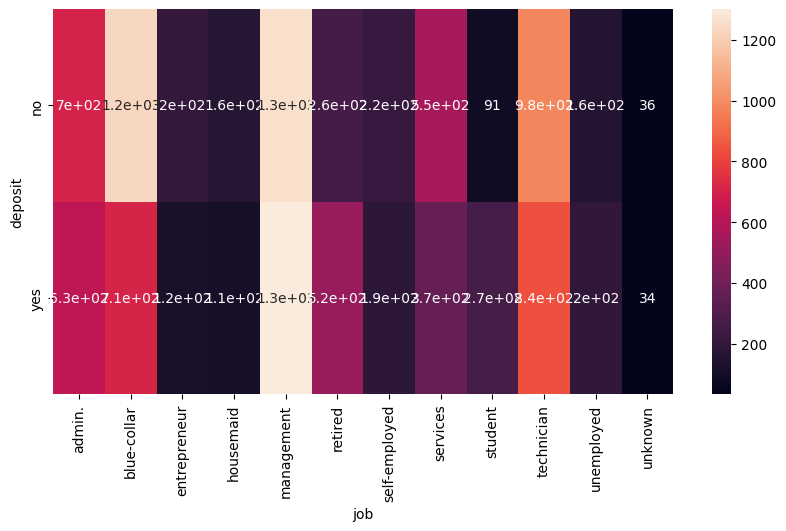

marital,divorced,married,single
deposit,,,
no,671,3596,1606
yes,622,2755,1912


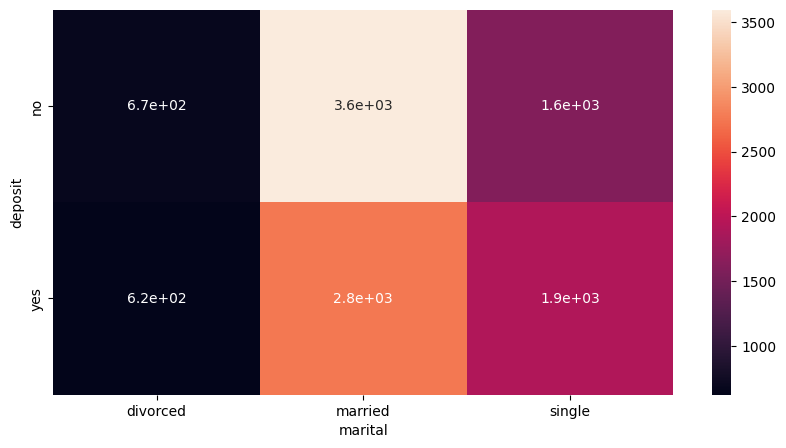

education,primary,secondary,tertiary,unknown
deposit,,,,
no,909,3026,1693,245
yes,591,2450,1996,252


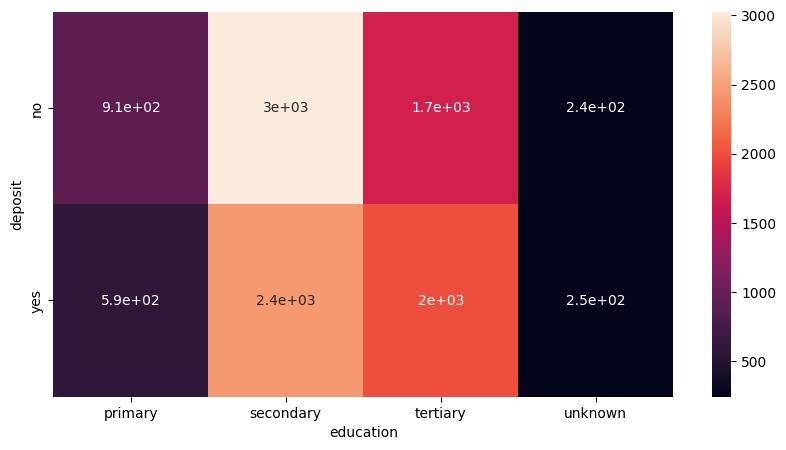

housing,no,yes
deposit,,
no,2527,3346
yes,3354,1935


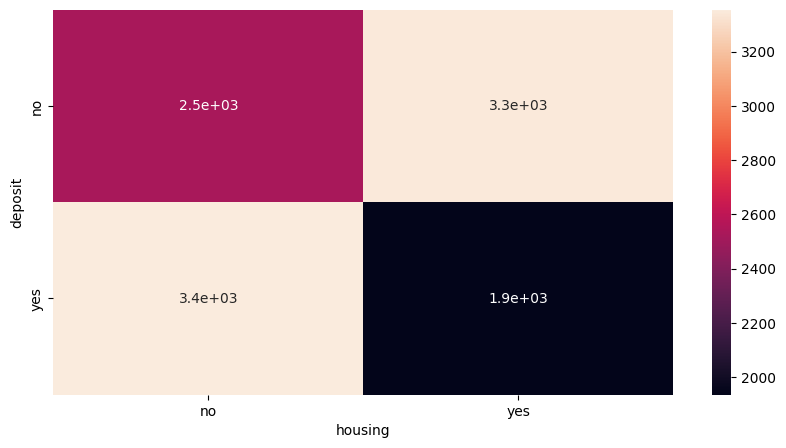

ValueError: Grouper for 'loan' not 1-dimensional

In [34]:
for col in cat_cols:
    agg = df.pivot_table(index = 'deposit' , columns=col , aggfunc=len , values="loan")
    plt.figure(figsize=(10,5))
    display(agg)
    sns.heatmap(agg , annot=True)
    plt.show()
    print("="*50)
    
agg = df.pivot_table(index = 'deposit' , columns="loan" , aggfunc=len , Values="marital")
display(agg)
sns.heatmap(agg , annot=True)


In [ ]:
plt.figure(figsize=(10,5))
agg = df.groupby(['loan' , 'marital'] , )

In [35]:
df.drop_duplicates(inplace=True)

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
x = df.drop("deposit" , axis=1)
y = df[["deposit"]]

In [40]:
from sklearn.preprocessing import MinMaxScaler
num_cols = x.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

In [41]:
string = ["job" , "marital" , "education" , "housing" , "loan"]
pd.DataFrame(df[string].nunique()).T

,job,marital,education,housing,loan
0,12,3,4,2,2
